In [47]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [66]:
df = pd.read_csv("../Data/X-values.csv", index_col=[0])
df = df.drop(["bioactivity_class","Name","canonical_smiles", "molecule_chembl_id"],axis=1)
yv = pd.read_csv("../Data/Y-values.csv", index_col=[0])
ts = TSNE(n_components=3, perplexity=30, random_state=42)
tsr = ts.fit_transform(df)

In [67]:
yv.pIC50.describe()

count    133.000000
mean       4.060148
std        1.783762
min        1.000000
25%        3.522879
50%        4.628932
75%        4.970616
max        7.301030
Name: pIC50, dtype: float64

In [68]:
yv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133 entries, 0 to 132
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pIC50   133 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


In [69]:
o,r = [],[]
for i in range(len(yv)):
    if yv.iloc[i][0]>7.0: 
        o.append("Potent Candidate")
        r.append("blue")
    elif yv.iloc[i][0]>6.0: 
        o.append("Good Candidate")
        r.append("green")
    elif yv.iloc[i][0]>5.0: 
        o.append("Possible Candidate")
        r.append("yellow")
    else: 
        o.append("Unsuitable Candidate")
        r.append("red")
r1 = np.array(r)

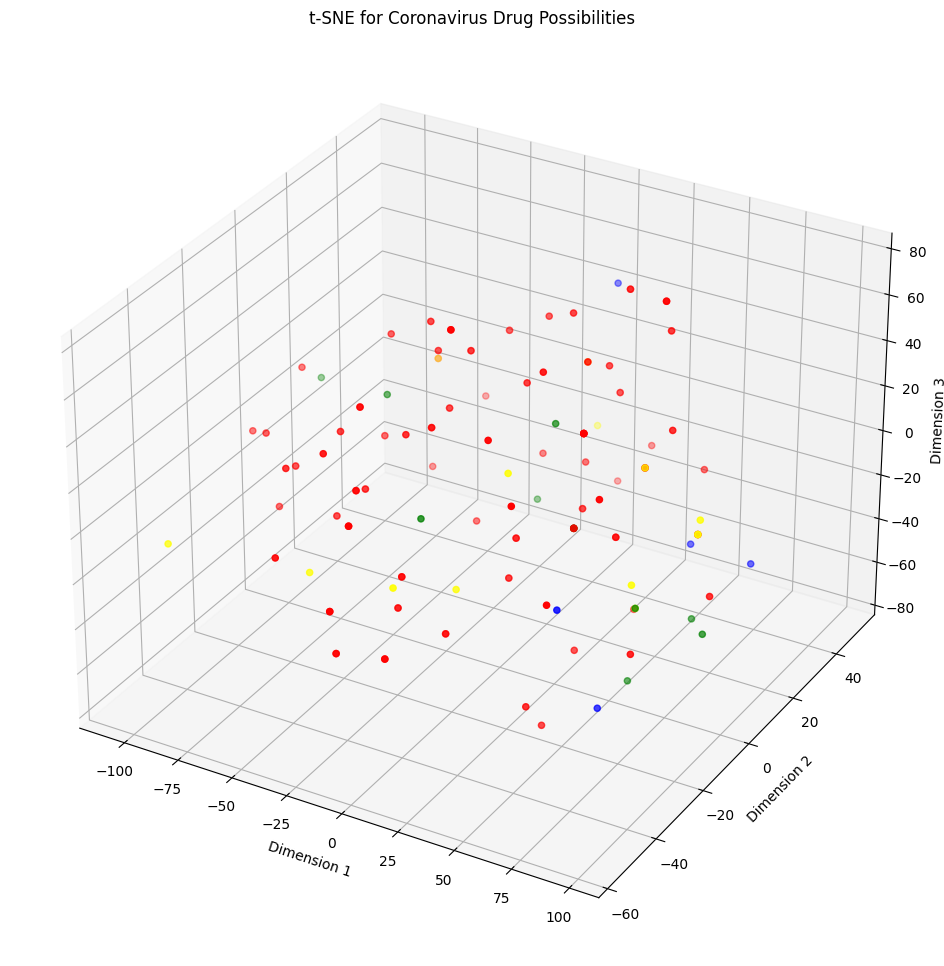

In [70]:
fig = plt.figure()
fig.set_size_inches(12,12,12)
ax = fig.add_subplot(projection='3d')
ax.scatter3D(tsr[:, 0],tsr[:, 1],tsr[:, 2], c=r1)
ax.set_title('t-SNE for Coronavirus Drug Possibilities')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
plt.show()